In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
from __future__ import print_function

import time
from PIL import Image
import numpy as np

from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16

from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import h5py

In [3]:
# install train picture
from PIL import Image
import io
from urllib.request import urlopen
height,width = 200,200

In [4]:
# import the necessary packages
import numpy as np
import urllib
import cv2
 

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

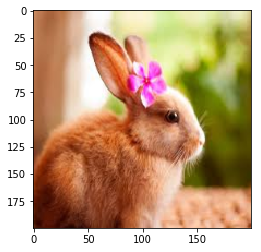

In [12]:
# CONTENT IMAGE
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExIVFRUWFRcVFRUVFRUVFRUVFRUWFhUVFxUYHSggGBolHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGy0fHSUvLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tL//AABEIAMcA/QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xAA8EAABAwMCBAIJAQcDBQEAAAABAAIRAwQhEjEFQVFhcYEGEyIykaGxwfDRFCNSYoLh8QdCchUzU8LSFv/EABoBAAMBAQEBAAAAAAAAAAAAAAIDBAEFAAb/xAAoEQACAgICAgEDBAMAAAAAAAAAAQIRAyESMQRBEwVRcSJhgZEUMqH/2gAMAwEAAhEDEQA/AD67kBcPRldL6q4x3UQSi6CHY1F0GLx6yegzKe2VNKrduU9sm4R40KyMnZTTrh1PZLaYTO1cq8fZHleh1TKklC0nKYFVJkjRu4pfeORFZ6WXDzKn8iX6aNSCKaIYgKVRFNepIySDROvVFqXupGpo2jcqKoFsXqGo9DJqgJEblG4Lx1RaOeppSQglYVK1yC9YthUQrJQcWGytgUI2qtxVTlNDAklQveo3VkJXrLJ5FQJNWqqH1iW3F8Ao6N8Cgx5Nm0OqNRGCqq6bvKlF73TvlSR4cV6qTXdXK9ddpTdXOd0p5LHQiJK6BqNRtYoYhEdQjY1F0GqIBE0wvHmE2wyndoklucpxbOwmwEzDmlMrRK6Sd2VPCpxrZJlehJ6S+nVrZHQ5xfVidDROO52BVfpf6uUy7/tODO+/5+eHML/F9XNVhzWqS0zIJecSnVpwylWJ0nIzIEGO46peXyXBlmHwoyjZ1vhfpxZXAkVmsdza8gFMbp4OWkEdRsuF3HAzTLp25O6J/wCjPHattDS/XT2h0uHgDy8UuXkRyKmeyfTpJXE6hTKm/aAOaA4Zf067NdJ0x7w5tPcKkcX9IXsvDTd7jYx49UrjvZHDFJy4nR23jeo+IUnrlX7MsrMDgpaRc10AkjoU141WmG8Q4dXUNSstA0leGmVJkcoumR5LTozUtJUwpr1tJBtiqIVtCIbRWxpLeISQG6Vp6wox1JQmilSTQSIy9BXVdMn0cJZeUilzm4hpFW4xdkYCh4deGMqTjNHml1B3JLx5F2bxH7LqVHUuyFHb25U/7J1T3K0eS2RftrkPUqkratSLUI6sVsWUwRvVKhlbVXKIFWF5M1EtQ9EIleBZLRKcWLEntWyVZrGjhNxqxOR0S29PKsFkzCWW9LKc2zVZiRDlZyL/AFO9HhSvPXBo0V/a6AVGwHjzw7+o9EhoWpbDmcsg8++V2L0/4WK9m8x7VL983+gHUO8tLvOFyy1pY6dP8fFS+XCmdPwcrcP3Qbwu9GW1WgyZ25RGEbd8Ca4a6MZ3ZyI7dEtfbCMHIzO4BTDgfFCMHEYI+/gua1xezp22uUf6FtnUfbVw9ssOzgRhw/hPIov0x4Zqc27ZllSGuHNrwNvkrHe2VOu3fMb9exXnBLcBrqFQS12M8ujgn4m3+h/wT5nF1kS2uxV6HXUHSSrbWZkEKoM4dUo3DmBpOkajAn2f4vDZW60qa2gc1RjeqZLmir5IYUBhbFqygIC9FRpOHD4r2XG5K0rObmg27RgCkDVjWqWEhImo0hYvHuhQmsAvOdBExaoKrgFt68Jdf3MJeSSrQXGw5lUQhbmCkY4wAdMogXwI3XOn5Mf9WbFCfjtJILdsO7qycRfqwgLKyzKXii5ybXQUhxZUcBSVmBT0GQFrWcF0JRpACu7IAyq9ePEpzxCqq3ePyggx8NBlYqIFbVitWK86YZQU5KgpKYLDGH8NZJVqs2YVa4WrRa7KnF0R5mGUgmVApcxMKCrgSTCInBXJr/hn7NcvomdAOqmT/wCN06c9st76SutBV/0x4J6+mKjB+9pSWj+NpjUzxwCO47lezw5R12gvGy/HLfTKHd2XNpBPfCUVJB1cxggdP1VktPaEb9DP0Sni9AtdO3jzXIzY9Wjv+Pk3TDuFcQwAfdPPmm1xcgBr94dBM8tlSrK50v0nnlsbT0Tq6v2spFrzDXCD47SAUnC5KSSKMuC3r2XngnFGPqlojV6sZ5kA7fNQekPF20HNJaHNcYMbjvPVUzgFuS5r6dZ7XCNL4Dhjk4bwrBxim986mAkjdpls+ByF9V4uH42l5Edf2t/joh/w4Y8659VtDu+f+7cWneIPiqu66LDuZMCO6huPSWmbbQdTajXhhBHNuZ+i9Zw6tVAe1pbImXYgEbqzw8MMeKfJqlJ+yrB4/wAMX8ulb7LN6P8AFPWF1M+83P8AZO3FVL0W4cKNRzn1Jecdu6sdxVhfP/U6x5LitM4n1DHCOZ/H0R3VVILq/wBLsnC94rxHTKpvFeIuPmuDPJyZFVFs/wCsDqlvEOLCDlUp944cytWVy45Kx8mgvl10Mn1i5+pO+HVCRlKbKmn1ixAvF+TsSp7sLpUpKPp24CipthbVKy6OHAscaGciYugJBxq/080fWuVU/SKvIQ+SrjSNtEVTiWrmgq1fKXNcQo6tUypo4qYxSLNVXtJavK3oroHVC6QUgWrFuvGMZ8MVntThVrhbVZrcYVGPoky9htHdNaDUqt903o7KvER5CQBerFicKKV6UcM9VU9cwfu3H2xyY8n3uzXTnofFL7u3bVYQd4V8vAC0ggEEEEHIIO4I5hUDi9u6gSabXVKX8LfafS8Bu9vzHflDnUYv8l/j5+ot/gpd9Q9WS04zLSguKXBfR5yDkdD1RHHr0VMtcPLcdik4ruG47eKhjDhNSXo+iwZ1rkWv0Bui5zWc9gPBXLjV5QMMqOdqLSS1ozHKTymMdVz7gt9TpnW1rSRsTIhw/igp/wCitKpcVaridb9LqmdyZa0Y/qnyC78vqPyKEcWpdW/Qvy5QllWS6pf9FVrweu95pUnFtNz9cAyPWNETqOdoHIbK5Wl5VcPV1HGW4Owz3CXU6lS3J0jLXZ6bn7FqY0eItre1pyffggFp2mei6eaOLx1y4/pfvvf3G+VOWRJuKcfT939/5A3UnMfqJJk9fsrNQY+pT1ATGCl9hatnNQOHQwrLZ1mMENEfRc36hPx/Ijxu/wAHI8/KpxUUraKZxOwc4kEEKucX4duuvO0P3AKQ8c9H5BczpsvmPK+mziueJ2cu01xejiVy0tMFa0qqe+kNgWuMjIVdDMpWOSlHYpxofWN4E5tL5U+kYR9CsQiWRwFuJeqNzI3WlWtCQWd9CONfUqsfkKSMoy8uFW+KP1KwVhIVev2EFHJWamL9KHrDKIc5RVVO0l0UxLASpqAyoERQKpR1Q1oW4WtNSALzBbHHCWqyW7cKv8IGystAYVONaI8r2TUgmFJ6BaVjrkBOU1EQ4OXQ0D146olZvwOahr8QxutfkRSPLx5P0S8VvgBA3VYuLrMyi69YHdK72iDlplcnyckpuxk/GmlpC3ivAqFzJcNFT/yMw4/8hs7zVRq8MqWjyyo7WwmWuHykclcqLnA7FQekzGupe0MjYpeDLJ9jvDlLlxfRQa7yHyzIO4nfy6qxeinpJ+y3FOo6dHuVcSdDtz/SYd/T3VbLfa3np1RtO3LpGcdVdGVOzoyVpxfR2L0joMewPYWua8B2sEEFsAhwcMEYVJdxGnSB0HUTgkZaf18iqZeVqzWspue/1bAQ1snSAXOeYbzy5x81H/1MgZz46hHzV2bzpzxfGtI9inLHj+O7LrR9JSTgQfAn8+KsnB+OayA4gHtzXIG8ZYDlknr7Q+hTyx9LGNOn1bXQNTi57optHfVgkwAJ59lz1Bp6FzcWjsNO90uEGQfkm9C75Fcj4d6UOr06lSlTmnQDXVHAu9hri7S/PtAeycxgDOMi48F40KrGnMxkHeR/hOjKUGRzxxmtDD0t9H216Zcwe0ASO64zXolriCF32wuZ3XMf9RuFequC4D2HgEHlPMfJS+ZiVfLH+SOcWnTKaETTUNKmXOgb/TuegRFSnpMTK58gKJA9F2d1ySwvWNqoEmnaM4lnY7CU8SC9t7zEIe7ryrF5CoziKnHKjepHqMoLsfjH8qSi7KG1rem9WI6bGtJymaVDa0y5OrSyA3IKFsGrDOENMJ42tCUNrtaICHrcV5fdH83FGLx+THVzd9CgKt2TsR4JQ+6JPKD3KAqXDhIEuPxj4JEszbKYYEkPKt84DP8AdLa/FY2Of4SldK6rOPuE56wjHWjnQSyOaW5NjlCMeyKpxc9D9whHXNQ5ZPx+ylL3NdGknpIOPNR1y6JPyiULoYvwMLPiZA9sZSbj3FdQLZwhLii4DUQ8Dt+iV3lfSZjb+pFG3oFYoRfI1pWznOEtEdxPyVjseHnTIiPADPl91DwCr6wai0gnmeQ8QPkrPa0esA+IOOSoTfQibRWbvh5duPn9ggTw1m23wVxubeHSASfKAl1Zm805HgY/utt9ApoqF/wYDOPGVW73hdUBw0uLXZloLod5TIK6jasFQEMABHb7oqnwhpMkGeoxI8RyTIZHECcYy0zk3BrW4o63UxW9phY/1bXkFkglr9I93GZXSfReu5lGnPvQMcwNIG35urXSsWFumD3gx80ivbIsdDIABxkd8HkUyWTmhUMag9F24feNcAQeXzRPHuGi6tn049sNJYf5hkKpcM4gI77GIg9VbeH8QDdzhFHi1T6ZPmxtrRyCs31f7tvv7vP8PY9/zuh2t8Sr/wD6gcD0A3NBns1DNQgSWk7OA77dp7lc4dVdMGfNczyMLhKidbJagQzjClJUNVJijWianVWtSqgnVVA64TFisFoOL1C96hFRaucjUD0dDr1yko1ZMbpc1yc8Hog5JiFVLSs6i26H3DnaG5W9TiY6wl1xcA4BQjr0gxA8ev6qVtyZXGCihtcV6hBOCPFKzxCP9o7+1HwQl1WLtsdiI+YSes+o1wlsjz+oWrHYXJIstIsftUcP5XER8Si7UkbgmObTP2VZo3gIgNAPUF4P1Ta1qNA0gOJO5BM/Erzx0jOdjR3EaoMFoI6kwfMYKkJqYc2qY6ewR/xmYB2z9UjudbnaXOIaNiSN+QBO/jnZF29UMxpBzzJMjsRifFZxZ60uiW54gATqYCenvTyAEb5Ugrho90B0ao6eZHUIevSFTOZ5BsggbEkifutqu3MasTziCBPU527pTTGpoItKo3f7XMbmekTOMb58kFxzhTXAOa0AkTJLpHSAMdOf0Ub7wscPDTGZJHfp9U6p0S4EueATsCcjG8Zj7xzCNJrYDasq/Drss/dGo3VyJa0ae+AMqxcL4m3/AHPJOwJ/3ctQCSX/AKKtJc9zpG43LndSegzz6oOyeynVmTjmcwG4xPPkAOqfGv5FzSa/Y6BVqeydOcc+Q6n9EvqO1ASAJ6iSc4AHXmhbfiYc1wloH0zEbwcB3wWVakvntHPEmPjy8ymiKom9VDgBmOXLxiU9tawBEkbKruJjAgGJjp07qdtyQMnMwR1PQE+O/bkmRaFyTZZql6AfeHYfRVziNxTJJJE52PPzkLy6uy1p77/nXzVcZXLnhzmS2cCfeyfbd0ZIPiWkDZxbn7mpDzhFyGy6dYJjbM8s/nJWinxJrgdX9+X3Ves9J5EAOiMAZjl5HCacH4YTUb4wR2GBM+aTylf6RjjHuReBRbUtX0yQQabm7zGD8wfovn8n2jJ5rrvpcDa0KjqTjqruOppIAa0j2tPefquNufko/LbdJraOS+KbcXYaCtHtUdOopgVz6oFyAq1NCVKabPag6zU6EzEDMUkLCF7KNsIZWdsXFNK1wKbNI3Q9FwptkpNe3eolHkbk6O5jglthL7ozgqazoVHu5jO5B/SEtsacn3vkf0Vs4ZQOIn7fosa4oK7JBZsa2DnrrAcJ+yHNNmGObqkxAkBveDv5JnVpN2Mnl18oOIUdtbNcRIwNoj9UHIygKl6Pt1Eh2OQaY+J3Sm8dodpJJHImMdt4V1ZSa7fBgQTz7EA/NVP0gsnayBEg9o8vgjVgAzHxkvxyBIMeAaT+cl7QuZJFN728+oJ+HjhazLNJEHl7Q+23n1Q/rIwRHliI5/nNMoyxhQuHH3iTB2dg46Zn6Jmy5k6KkN5mHTpHTEyYk5Kr1hVBcY6EyYEQIBnxT23tpZowSZyD137Dl8OaCUUEpAF/VJJe12xGjPkD9T/hT2942IBMCNR6neO/n02OyB4rdQdIbGmM9RG3z7bom09rSTvE/OB4bEx4LVHRl7LC27DmRG4AA6k7Y5lKLjgjQXkH3Y26mf8A5WlKqackmO+oHvjvnfw7JhTr4MnfJ7aufjt80Eo10FFglrwr95obAGT2xMfdbs4ZWmSTknT4zue+AnPCh7pjm6fDOpObJocAD/ET4ZBGFsG2DN0VoMqgwWnGZA6dT2z8kEbjLmlpETjmdozyHNdG/ZgeQ6/Gf7JfxDgjHOJDc7Y5p/FiPkVlA9qo4MHtSSIGNXWSBLW9XbnYAyp3t0+2Pah2ljYEVKmG6oEghsQAJEtawSGu12Q+j4YdLOf/AHHjeP4GnlPXxPIAMeI2DGMY8NALB7IAgNOwPaBnyCNXQEpxTsQ2vD3vLA2T7Wpx6hp0Ek/8tcHxVwpXNO3Bc7JHTtP2+hVTr8WcHaGYa1oaB1IbVB2/mZPmkXHeOahAJh0OB6HceYM+SGM4x2uyfLlc9egr079JTUO+NgO3ZUH9pytOI3BcZPyQDXrzXPbJx3RrIxlVI6FVGsqqaeM9Qc6qhqtRROqKB71kcZ4lNRZrQxcvA9N4Gj/iFflKSPJJx8UVf1ZMITUvRXs7bfoZ2DtMGfL+0J9b3W25+vkCq1b3DeWSE1sa0dsch90E4thRaLAx+wEZ5n5nuiqQa1oOSfhvzSa3qf7ifj+eSP4eC50uI0zieZ7eGUmthy6H1nWGkTpmJcYkZzkqvcfohxOkYzvsZHIeQT6owQM47f2SK6LmhwI8MySTPMnkPsqUtEvsUWTROnUJHu4mVpc0JMNBMTLjnPMgnzQrajg4gAQGwTjn9vHdMa1LbwMSSRPUjnH1PiiNFdvcuaTtO2dRMdZ2+KKoXZadyTmBgAcp8s5QtHJJjA91vU7aj8EJUe4v9kx1OCe/YDdbRlhfEPaeHTqae+DA/WcJpasmm0E/7pdsIaOXwESlrSAD5AdBHj47rag7IEzEY6uMn7AIWEgl5cdJgeBzzhpzz/Qo+iJ9kOknBjt35mefj3QpIlomdIJPicb+aItnQY1gSPOT35LGEkWfh9KGta5wxkkmJMbDPc/HsmNo0tdqnDskHynwwFXrEvka3y0QB4ePTZWmzcCDjA55k9Vi7AnoY0qoPnHwP4EVpx3+3TxQVu0b8uSPo0+viqIbI8mjX1A2hL/SZ2mm0Dm4T4Tn7/FO6YVU9Ob0MDZBiR7Q2GeaZPUGIuzntO7OkGctdq8iT93H4pTeidtgSty8lauC5akxDYmuGIJwTi6ppVVGVbilaNTNaTkbSegCEVbBFNasKgpaOap2tXj2pFmUCELVSPC8ZSJTEz1N9E95WzMJdVrKWvUKGeU2EaOpORNb1TI5p/bPhv8AMdzvAHT9VWaTs4TSlULWjv8AkBenE9CRYLevI38Bv4/5TayuIM8xt2iNhzKqdCvHjtP2TmzuYPLPOZCmlAep6LTb3WM4yd+u/wB0q4xcgGTuBpHcncqAXYEQSTHy5fqheI1NRGe+eU80cUKfZA2AHSJLiI/PIIqvdYDeZwTnA2gfM+aEuDDsZHJaufHhzPxwFrCRrXcGwG4nngbmP/VQC3/hGAO+Tymfzmtg3UNX82PgEV6sRJOB12nr3WmANQkCPzuprIAOaT4n4ET9ShLitnbHJbvf9B/j5IGg0NqEe9G8QDyEwPomFhT1eZn5pZYu9h2OQ+2PqnFm2G4QhDGzaPdO3Xtkp/RjSIMAz8IASK22HTJP2TWxmCD3HzwvJC5Mf2gwI2HLsmVNLbVpwmDICsxxogyu2bVnwCJVY4nYmoTJkHknFxXErUNBQZHy0FjhStlZbwFg2aPgoKnowwn3VbXNA3XtOo3kpnjiMcE10Uq49Fmx7oSz/wDKU5Psj4LpjmtcNkFcUmDkiUEujFCP2OfH0Qb0Xh9EWjIEK/sYIWvqQeS80M4x+xSqXoyI2+Sw+iYPJXkMA3C9pPacBDxQLxxfo5rxD0YDeWFFQ4I0DZdKv7QEbKuVrGDsVk1QzHCPdHH7gQSoHU5ypa7/AGjK8arVpC+2ZREdB+dFNr55KjIXj3RzWdhdE7a/XYfBNLG7mT8PLYKth8mBsmdMnTnHbsvSgYplgFzI79fr+d1FUu9RECfmfz9EnFUzk46eY5Iq0qmdxA54CHjRvKxvXJIHXaUJ6yJHaPmM/BT0qs+Q+CEqunbqgaGJhDJADNuZPQfn0Wz6wMDyGMAeHVQXFTpzUD64ad8AT4nmvUes8u2wVLSoF0SgmXOt4Lv8TyT61aDt5nkhloOOySyb7REYJHyVqs7eYPKCktrRyPLP54KyWbCB1jHxSk7Zs9I8dbloEDE/5Rdg0zHJGWlRrwQRBRFChD46KiMPsSyn6YZQaYlElxIUWy8Y9MlKtClFvYNdCMlZZVwVvf0gW7pVYuLXacKZt8ilJOI5uSCEsBg4KLIK2bbAmVrTZiaR42rCjumFwlZVeGmJUoqSIyvWuj1ewe3rNGCp21hKErWo3QNO6GvTq8kFtdh8U+hxdP8AZwFV38QLKulWoRCDuuENdkjuilD2DGSWmS07oOC9bRB3QFWtoEBvmsteICN1nOzXD7HA7yjnBXtLA7rFis9CVpmzndkNUcSV4sWxPTZLqa3+y1dfmVixMUUxEptdBDrhsA/mFta3UZ5beHZYsWcVQSk7GltcyPgPHMn87Ld9STHcf3WLFO1soTMuKkfRLrqpDT4/JYsWxR6XQNYOJIM81cOH5aO6xYgz9h4ehxQccTz28eSs/CcjP5C8WJWNbCyvRLcVtJHknvD3as+CxYqodkmTo34o0xIUVrQ1DusWIMkVyPY5PgbOtSOaUXHDiyp6zVjmF4sSpxVDscm2NqLdQCNpNDQsWLU9GSW6F1xQGvXhE1gCyQsWLV7MfoHoN1DKEv8Ah4Z7YEFYsWNJxNUmp0LrXip1RnCasvHuGAI8V6sScdsdk1sFunGDIVKurysHuDAAAecLFi2WjYOz/9k="
cpic =  url_to_image(url)
cpic = cv2.cvtColor(cpic, cv2.COLOR_BGR2RGB)
cpic = cv2.resize(cpic, dsize=(height,width))
plt.imshow(cpic)
plt.show()

In [ ]:
"""# CONTENT IMAGE
height = 177
width = 177

#cpic = cv2.imread("cpic.png", 0)
#cpic = cv2.resize(cpic, (height, width))
# OR

#cpic = mpimg.imread("cpic.png")
cpic = Image.open('../input/styletransfer/rsz_cpic.png')
cpic.resize((height,width))
plt.imshow(cpic)
plt.show() """

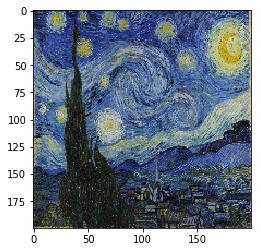

In [15]:
# STYLE IMAGE
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
spic =  url_to_image(url)
spic = cv2.cvtColor(spic, cv2.COLOR_BGR2RGB)
spic = cv2.resize(spic, dsize=(height,width))
plt.imshow(spic)
plt.show()

In [ ]:
"""# STYLE IMAGE
spic = Image.open('../input/artistic-neural-style/spic.png')
spic = spic.resize((200, 200), Image.ANTIALIAS)
spic.resize((height,width))
plt.imshow(spic)
plt.show()"""

In [16]:
c_array = np.asarray(cpic, dtype='float32')
c_array = np.expand_dims(c_array, axis=0)
print(c_array.shape)

s_array = np.asarray(spic, dtype='float32')
s_array = np.expand_dims(s_array, axis=0)
print(s_array.shape)

(1, 200, 200, 3)
(1, 200, 200, 3)


In [17]:
vgg_mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape((3,1,1))

"""
     Subtracts the mean RGB value
     The mean RGB was computed on the image set used to train the VGG model.
"""
# content image
c_array[:,:,:,0] -= vgg_mean[0]
c_array[:, :, :, 1] -= vgg_mean[1]
c_array[:, :, :, 2] -= vgg_mean[2]

# style image
s_array[:, :, :, 0] -= vgg_mean[0]
s_array[:, :, :, 1] -= vgg_mean[1]
s_array[:, :, :, 2] -= vgg_mean[2]

# Flip the ordering of the multi-dimensional array from RGB to BGR
c_array = c_array[:, :, :, ::-1]
s_array = s_array[:, :, :, ::-1]

In [18]:
cpic = backend.variable(c_array)
spic = backend.variable(s_array)
combination_image = backend.placeholder((1, height, width, 3))

In [19]:
input_tensor = backend.concatenate([cpic,
                                    spic,
                                    combination_image], axis = 0)

In [20]:
def load_split_weights(model, model_path_pattern='model_%d.h5', memb_size=102400000):  
    """Loads weights from split hdf5 files.
    
    Parameters
    ----------
    model : keras.models.Model
        Your model.
    model_path_pattern : str
        The path name should have a "%d" wild card in it.  For "model_%d.h5", the following
        files will be expected:
        model_0.h5
        model_1.h5
        model_2.h5
        ...
    memb_size : int
        The number of bytes per hdf5 file.  
    """
    model_f = h5py.File(model_path_pattern, "r", driver="family", memb_size=memb_size)
    topology.load_weights_from_hdf5_group_by_name(model_f, model.layers)
    
    return model

In [21]:
from keras.applications import vgg16, vgg19
model = vgg16.VGG16(input_tensor=input_tensor,include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [22]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(3, 200, 200, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(3, 200, 200, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(3, 100, 100, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(3, 100, 100, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(3, 100, 100, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(3, 50, 50, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(3, 50, 50, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(3, 50, 50, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(3, 50, 50, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(3, 25, 25, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(3, 25, 25, 512) dtype=float32>,
 'block4_co

In [23]:
content_weight = 0.025
style_weight = 5.0
total_variation_weight = 1.0

In [24]:
loss = backend.variable(0.)

In [25]:
def content_loss(content, combination):
    return backend.sum(backend.square(combination - content))

In [26]:
layer_features = layers['block2_conv2']
content_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]

loss += content_weight * content_loss(content_image_features,
                                      combination_features)

In [27]:
def gram_matrix(x):
    features = backend.batch_flatten(backend.permute_dimensions(x, (2, 0, 1)))
    gram = backend.dot(features, backend.transpose(features))
    return gram

In [28]:
# style transfer
# at higher layer ,we lost the pixel value and the structure of the image 
# general content is preserved semantic information is retained
# texture transfer
# algorithm allows to produce new images of high perceptual quality that combine the content of an arbitrary 
# photograph with the appearance of numerous wellknown artworks
# we uses higher feature from higher layer of the VGG network
# we look at correlation bewteen feature responses in an image
# in each layer we take pair of features map nd multiple them point wise and sum over the spatial extent
# that gives us one correlation value i.e gives a no. that tells how correlated are these two features
# in response to that particular image.
# do it for all the layers to get the correlation matrix.
# generating a new image that produces correlations between feature responses 
# texurised version of input image where local image structure and colour are preserved 
# but outline is lost
# feature map is the output of one filter applied to the previous layer

def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = height * width
    return backend.sum(backend.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

feature_layers = ['block1_conv2', 'block2_conv2',
                  'block3_conv3', 'block4_conv3',
                  'block5_conv3']
for layer_name in feature_layers:
    layer_features = layers[layer_name]
    style_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_features, combination_features)
    loss += (style_weight / len(feature_layers)) * sl

In [29]:
def total_variation_loss(x):
    a = backend.square(x[:, :height-1, :width-1, :] - x[:, 1:, :width-1, :])
    b = backend.square(x[:, :height-1, :width-1, :] - x[:, :height-1, 1:, :])
    return backend.sum(backend.pow(a + b, 1.25))

loss += total_variation_weight * total_variation_loss(combination_image)

In [30]:
grads = backend.gradients(loss, combination_image)

In [31]:
outputs = [loss]
outputs += grads
f_outputs = backend.function([combination_image], outputs)

def eval_loss_and_grads(x):
    x = x.reshape((1, height, width, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    return loss_value, grad_values

class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [33]:
x = np.random.uniform(0, 255, (1, height, width, 3)) - 128.

iterations = 100

for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    end_time = time.time()
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 30650642000.0
Iteration 0 completed in 2s
Start of iteration 1
Current loss value: 13113503000.0
Iteration 1 completed in 2s
Start of iteration 2
Current loss value: 9734183000.0
Iteration 2 completed in 2s
Start of iteration 3
Current loss value: 8453719000.0
Iteration 3 completed in 2s
Start of iteration 4
Current loss value: 7808329000.0
Iteration 4 completed in 2s
Start of iteration 5
Current loss value: 7476590600.0
Iteration 5 completed in 2s
Start of iteration 6
Current loss value: 7227236000.0
Iteration 6 completed in 2s
Start of iteration 7
Current loss value: 6970963000.0
Iteration 7 completed in 2s
Start of iteration 8
Current loss value: 6816040000.0
Iteration 8 completed in 2s
Start of iteration 9
Current loss value: 6673450500.0
Iteration 9 completed in 2s
Start of iteration 10
Current loss value: 6572967000.0
Iteration 10 completed in 2s
Start of iteration 11
Current loss value: 6485783600.0
Iteration 11 completed in 2s
Start of i

Current loss value: 5899454500.0
Iteration 98 completed in 2s
Start of iteration 99
Current loss value: 5899390500.0
Iteration 99 completed in 2s


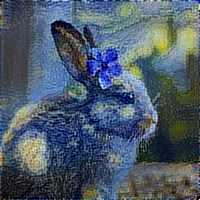

In [34]:
x = x.reshape((height, width, 3))
x = x[:, :, ::-1]
x[:, :, 0] += 103.939
x[:, :, 1] += 116.779
x[:, :, 2] += 123.68
x = np.clip(x, 0, 255).astype('uint8')

Image.fromarray(x)